Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

The homework sheets will usually be available on Monday and are supposed to be solved in groups of three. They have to be handed in before Monday morning of the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass $N-2$ of the weekly provided exercise sheets.

Sign up for a group on Stud.IP (See `Participants` -> `Functions/Groups`). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something. 

Your group will have a group folder in Stud.IP under `Documents`. Upload your solutions there to hand them in.

All exercise sheets will use [Jupyter Notebooks](http://jupyter-notebook.readthedocs.org/en/latest/notebook.html). To be able to run these on your system, you will need to install Python and a few packages. We suggest you to use the latest version of Python 3. In case you are not familiar with it, follow the directives below ([Assignment 0](#install-conda)) to get it up and running. [Assignment 0b](#run-jupyter) on this sheet will provide details on how to run the notebooks with Jupyter.

This week's sheet should be solved and handed in before the end of **Sunday, November 11, 2018**. 
Please upload your results to your group's Stud.IP folder. In case you cannot do this first sheet (due to technical or organizational problems) please upload a description of your problem instead. Your tutor will help you to solve the problems in the first feedback session and you may hand in this sheet together with the second sheet one week later.

<a name="install-conda"></a>
## Assignment 0: Setup your homework environment [0 Points]

This exercise gives you no points, but it is required to do the other exercises. If you have problems, do not hesitate to contact us.

### a) Install Conda

To be able to run Jupyter Notebooks you will need Python. Follow this exercise to get everything up and running.

We recommend to use Anaconda:
* Download and install Anaconda from https://www.continuum.io/downloads that contains all important Python packages.
* If you have limited diskspace install Miniconda https://conda.io/miniconda.html instead, which contains only conda and Python.

Follow the installation instructions on the web site.

### b) Setup the `cv` environment

Download `cv.yml` from Stud.IP. Then in a terminal navigate to the directory where you saved `cv.yml` and run

```sh
conda env create -f cv.yml 
```

### c) Activate the environment 

Always activate the enviornment when you work on the homework. 

Linux/Mac OS:

```sh
source activate cv
```
    
For Windows:
```sh
activate cv
```

<a name="run-jupyter"></a>
### b) Run Jupyter Notebooks

After you installed Python and Jupyter verify you are able to run the notebook server by opening your command line, navigate to the directory where you downloaded the `sheet01.ipynb` to, e.g. `~/university/CV2018-19` or `C:\Users\Documents\University\CV2018-19` and run jupyter in that directory.

```sh
cd ~/university/CV2018-19
jupyter notebook
```

Usually a browser window should open up. If not, open your favorite webbrowser and navigate to [localhost:8888/tree](localhost:8888/tree).

You will be presented with a list of files, choose `sheet01.ipynb`: You are good to go now and can start working on your homework right away!

### c) Check your installation
Check that your installation succeeded and all required packages are available by executing the following cell (type <kbd>Ctrl</kbd>+<kbd>&#x23ce;</kbd>, on German keyboards <kbd>Strg</kbd>+<kbd>&#x23ce;</kbd>, or press the "run cell"-button at the toolbar above):

In [1]:
import importlib
assert importlib.util.find_spec('numpy') is not None , 'numpy not found'
assert importlib.util.find_spec('matplotlib') is not None, 'matplotlib not found'
assert importlib.util.find_spec('scipy') is not None , 'scipy not found'

### Remarks:

* If you experience any troubles, ask your fellow students or send us an e-mail - we are always happy to help.
* If you do not want to use Python to do the exercises, but prefer another programming language, you may ask the tutors if they are willing to support it. However, the practice sessions will focus on Python and will probably not cover other languages.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

Convolution in the context of images is a discrete approximation of a convolution of two 2D functions. It is roughly a weighted local averaging and can for example be used to approximate derivatives of an image.

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.


### Linearity

A colvolution operation is linear.

An operation is linear if it satisfies:
$$O(a+b) = O(a)+O(b)$$
and
$$O(a*c) = c*O(a)$$

for a given pixel in the image the convolution can be expressed as

$$ I_{i,k} = \sum_{k - s}^{s}{ \sum_{l-s}^{s} {A_{i+k,j+l}*K_{k+s,l+s} }} $$

if a sum of two images is convolved we can also separately compute their convolutions and sum the results.

$$\sum_{k - s}^{s}{ \sum_{l-s}^{s} {(A_{i+k,j+l}+B_{i+k,j+l})*K_{k+s,l+s} }}$$
is equivalent to
$$\sum_{k - s}^{s}{ \sum_{l-s}^{s} {A_{i+k,j+l}*K_{k+s,l+s} }} + \sum_{k - s}^{s}{ \sum_{l-s}^{s} {B_{i+k,j+l}*K_{k+s,l+s} }} $$
due to the commutativity of the summation operator.

Analogous from the distributive property of the summation operation it follows that

$$\sum_{k - s}^{s}{ \sum_{l-s}^{s}{ c*A_{i+k,j+l}*K_{k+s,l+s} }}$$
is equivalent to
$$c * (\sum_{k - s}^{s}{ \sum_{l-s}^{s} {A_{i+k,j+l}*K_{k+s,l+s} }})$$

The convolution operation is therefore linear.


### Homogeneity
Since the image indices are involved in the computation of a convolution the function is inhomogeneous.

$g'(x,y) = O(g(x,y),x,y)$


### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

The number of summations and multiplications per resulting pixels is $(2m+1) \times (2n+1)$.
There exist $M \times N$ pixels for which these summations and multiplications have to be computed.

Under the assumption that the border case is handled by some kind of image extension (e.g. zero padding) it follows that one has to perform $(M \times N)*((2m+1) \times (2n+1))$ summations and multiplications.

An image of size (100,100) convolved with a kernel of size (3,3) therefore results in $100*100*3*3 = 90000$ multiplications and additions.


### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results.

A separable kernel is a kernel that can be expressed by the outer product of two vectors.

e.g. a box kernel 

$$\begin{bmatrix} 1&1&1 \\ 1&1&1 \\ 1&1&1 \end{bmatrix} = \begin{bmatrix} 1\\1\\1 \end{bmatrix} \begin{bmatrix} 1&1&1 \end{bmatrix}$$

The computation of the convolution of a separable (k,k) kernel can be split up into the computation of a convolution of the horizontal filter (1,k) over the colums of the image followed by a convolution with the vertical (k,1) filter over the rows of the image of the previous result.
This reduces the computation complextity of the quadratic kernel part to a linear part which can have significant impact when using large kernels.

$$ (M \times N)*2*k $$


## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. 
Then realize the following filters, describe their effect and possible applications.

### a) Box filter

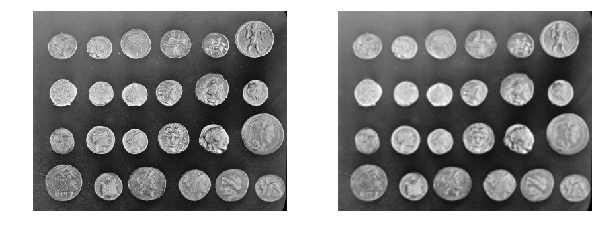

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
import scipy.ndimage as ndi

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
kernel_size = 3
kernel = np.ones((kernel_size,kernel_size))
filtered_image = ndi.filters.convolve(image,kernel)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

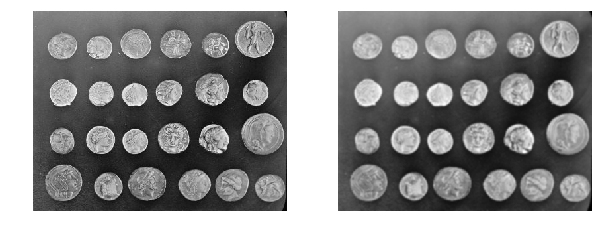

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
import scipy.ndimage as ndi

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
def get_binomial_vector(n):
    """
    This function generates the n-th row of pascals triangle for the binomial approximation of a gaussian
    Since the n-th row is binom(n,0), binom(n,1),... binom(n,n)
    the row is computed using the identity:
        
        binom(n,k) = binom(n,k-1)*(n+1-k)/k
    
    Note: to get a binomial vector of length k we have to compute the n-1 row
    
    """
    if n==0: return None
    if n==1: return np.ones(1)
    n -= 1
    v = np.zeros(n+1)
    v[0] = 1
    for k in range(1,n+1):
        v[k] = v[k-1] * (n + 1 - k) / k
    return v

def get_gaussian_kernel(kernel_size):
    """
    This function returns a binomial approximation of a gaussian kernel
    The kernel is normalised by its sum; therefore sum(kernel)=1
    """
    v = get_binomial_vector(kernel_size)
    kernel = np.outer(v,v)
    return kernel/kernel.sum()

kernel_size = 5
filtered_image = ndi.filters.convolve(image,get_gaussian_kernel(kernel_size))

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

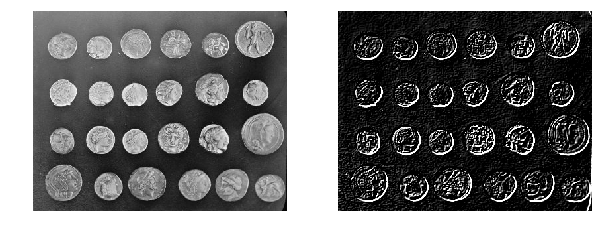

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
import scipy.ndimage as ndi

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
def get_sobel_kernel(kernel_size,vertical):
    """
    This function generates either vertical or horizontal sobel filters
    The computation is based on a directional dependent quadratic normalisation
    """
    if kernel_size<=2: return None
    
    kernel = np.zeros((kernel_size,kernel_size))
    
    h = kernel_size//2
    for i in range(-h,h+1):
        for j in range(-h,h+1):
            kernel[i+h,j+h] = (i if vertical else j)/max(1,(i*i + j*j))
            
    return kernel

kernel_size = 3

diagonal_kernel = np.array([[-2,-1, 0],
                            [-1, 0, 1],
                            [ 0, 1, 2]])

vertical_filtered   = ndi.filters.convolve(image,get_sobel_kernel(kernel_size,vertical=True))
horizontal_filtered = ndi.filters.convolve(image,get_sobel_kernel(kernel_size,vertical=False))
diagonal_filtered   = ndi.filters.convolve(image,diagonal_kernel)

filtered_image = np.clip(vertical_filtered + horizontal_filtered + diagonal_filtered,0,255)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) * \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$.

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.



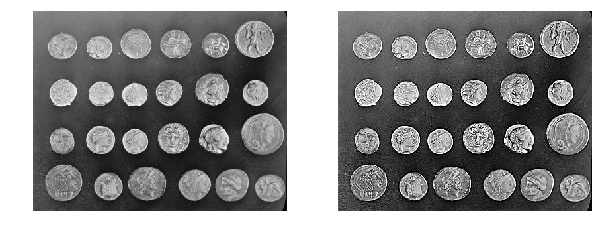

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data


# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)


from scipy import misc, ndimage
from scipy.ndimage.filters import convolve


# Define sharpening amount
amount = 2.0

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

# YOUR CODE HERE
unsharp_image = ndi.filters.convolve(image,gauss_5)
unsharped_mask_image =  image + (image-unsharp_image)*amount
unsharped_mask_image = np.clip(unsharped_mask_image,0,255)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(unsharped_mask_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

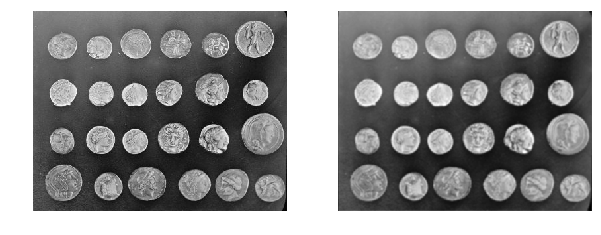

In [62]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    img -- the image, provided as a two-dimensional array
    kern -- the kernel, also a two-dimensional array
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    
    # Compute the convolution
    # YOUR CODE HERE
    for i in range(M):
        for j in range(N):
            
            for k in range(-mh,mh):
                for l in range(-nh,nh):
                    result[i,j] += img[(i+k)%M,(j+l)%N]*kern[k+mh,l+nh]

    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = data.coins().astype(np.float32)

box_3 = 1/9 * np.asarray([[1,1,1],[1,1,1],[1,1,1]])
kernel = get_gaussian_kernel(5)

filtered_image = my_convolve2d(image,kernel)

fig = plt.figure(figsize=(10,5))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = plt.get_cmap('gray'))
plt.axis('off')
plt.show()

When computing the pixels near the boundaries the convolution has to sum up pixels outside the image.
This can for example be resolved by handling pixels outside the image as zeros or a constant factor. 
Alternatively one can repeat the image which can not only conviniently be implemented by a modulo operation of the indices but also has the mathematicaly advantageous property that the image in its fourier space representation is exactly this repeated image. It can however lead to artifacts which may not be wanted in some applications.